In [ ]:
import numpy as np
import matplotlib.pyplot as plt

Gaussian Function for 2-D 

In [ ]:
def gaussian(x,y,mux,muy,sdx,sdy):
  return (1/(2*np.pi*sdx*sdy))*np.exp(-1*((x-mux)/sdx)**2-((y-muy)/sdy)**2)

Below code help us to generate the two classes with 100 points each which will be sufficiently separated 

In [ ]:
mu1x,mu1y = 0.5,0.5 #mean for class 1 distribution
mu2x,mu2y = -0.5,-0.5 #mean for class 0 distribution
va1x,va1y = 0.25,0.25 #variance for class 1 distribution
va2x,va2y = 0.25,0.25 #variance for class 0 distribution

In [ ]:
gridx = np.linspace(-2,2,400)
gridy = np.linspace(-2,2,400)
xv,yv = np.meshgrid(gridx,gridy)
prob1 = gaussian(xv,yv,mu1x,mu1y,va1x,va1y) #probability class 1 w.r.t [-2,2]x[-2,2] grid with 400x400 points
prob2 = gaussian(xv,yv,mu2x,mu2y,va2x,va2y) #probability for class 0 w.r.t [-2,2]x[-2,2] grid with 400x400 points

In [ ]:
delta = 0.01
prob1 = prob1/prob1.max()
prob2 = prob2/prob2.max()

Q1) Distribution

In [ ]:
n = 100
x1 = []
x2 = []
for i in range(n):
  val = np.random.rand()
  one1 = prob1.copy()
  one1[one1<val] = 0
  one1[one1>val+delta] = 0
  t1 = np.argwhere(one1>0)
  arg = np.random.choice(t1.shape[0])
  x1.append(-2+t1[arg]/100)

  val = np.random.rand()
  one2 = prob2.copy()
  one2[one2<val] = 0
  one2[one2>val+delta] = 0
  t2 = np.argwhere(one2>0)
  arg = np.random.choice(t2.shape[0])
  x2.append(-2+t2[arg]/100)

x1 = np.array(x1)
x2 = np.array(x2)

We have a region around random probability chosen so that selected that probability we will have p<=a<=p+delta region for selecting points on the grid. Selecting a random point on that region is equivalent to selecting a point in gaussian distrubution because of the random sampling of probability distrubution on gaussian function

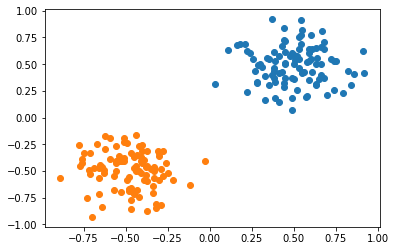

In [ ]:
plt.scatter(x1[:,0],x1[:,1])
plt.scatter(x2[:,0],x2[:,1])

In [ ]:
w = np.array([0,0])
b = 0

Initial weights 0,0,0 bias is not being updated here

In [ ]:
T = 100
lr = 1
conv_epoch = -1
prev_w = np.array([-1,-1])
for i in range(T):
  y_exp1 = np.sum(w*x1,axis=-1)+b
  y_exp1[y_exp1<=0] = 0
  y_exp1[y_exp1>0] = 1
  y_exp2 = np.sum(w*x2,axis=-1)+b
  y_exp2[y_exp2<=0] = 0
  y_exp2[y_exp2>0] = 1
  w = w - lr*np.matmul((y_exp1-1).reshape(100,1).T,x1)
  w = w - lr*np.matmul((y_exp2-0).reshape(100,1).T,x2)
  b = b - lr*(y_exp1-1).sum()
  b = b - lr*(y_exp2-0).sum()
  if((prev_w-w)**2).sum()<0.01 and conv_epoch ==-1: #mse for convergence
    conv_epoch = i
  prev_w = w.copy()

Perceptron algorithm y_exp1 is expected output for class 1 points according to weights and y_exp2 is expected output for class 0 points

Q2 Weights

In [ ]:
w,b

(array([[97.95, 97.98]]), 0.0)

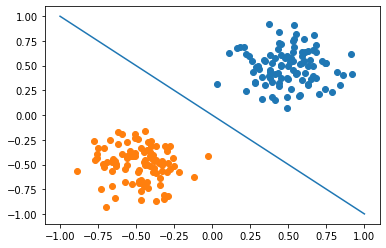

In [ ]:
def plot_line(w,b):
    x1 = -1
    x2 = 1
    y1 = -1*w[0]*x1/w[1]-b/w[1]
    y2 = -1*w[0]*x2/w[1]-b/w[1]
    plt.plot([x1,x2],[y1,y2])

plt.scatter(x1[:,0],x1[:,1])
plt.scatter(x2[:,0],x2[:,1])
plot_line(w[0],b)

Q3

In [ ]:
mu1x,mu1y = 0.5,0.5 #mean for class 1 distribution
mu2x,mu2y = -0.5,-0.5 #mean for class 0 distribution
va1x,va1y = 0.8,0.8 #variance for class 1 distribution
va2x,va2y = 0.8,0.8 #variance for class 0 distribution

In [ ]:
gridx = np.linspace(-2,2,400)
gridy = np.linspace(-2,2,400)
xv,yv = np.meshgrid(gridx,gridy)
prob1 = gaussian(xv,yv,mu1x,mu1y,va1x,va1y) #probability class 1 w.r.t [-2,2]x[-2,2] grid with 400x400 points
prob2 = gaussian(xv,yv,mu2x,mu2y,va2x,va2y) #probability for class 0 w.r.t [-2,2]x[-2,2] grid with 400x400 points

In [ ]:
delta = 0.01
prob1 = prob1/prob1.max()
prob2 = prob2/prob2.max()

Q3 distribution

In [ ]:
n = 100
x1 = []
x2 = []
for i in range(n):
  val = np.random.rand()
  one1 = prob1.copy()
  one1[one1<val] = 0
  one1[one1>val+delta] = 0
  t1 = np.argwhere(one1>0)
  arg = np.random.choice(t1.shape[0])
  x1.append(-2+t1[arg]/100)

  val = np.random.rand()
  one2 = prob2.copy()
  one2[one2<val] = 0
  one2[one2>val+delta] = 0
  t2 = np.argwhere(one2>0)
  arg = np.random.choice(t2.shape[0])
  x2.append(-2+t2[arg]/100)

x1 = np.array(x1)
x2 = np.array(x2)

We have a region around random probability chosen so that selected that probability we will have p<=a<=p+delta region for selecting points on the grid. Selecting a random point on that region is equivalent to selecting a point in gaussian distrubution because of the random sampling of probability distrubution on gaussian function

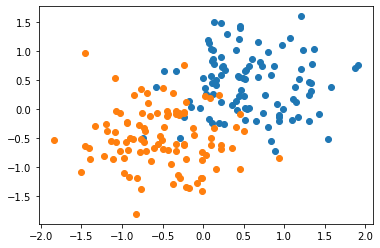

In [ ]:
plt.scatter(x1[:,0],x1[:,1])
plt.scatter(x2[:,0],x2[:,1])

In [ ]:
w = np.array([0,0])
b = 0

Initial weights 0,0,0 bias is not being updated here

In [ ]:
T = 100
lr = 1
conv_epoch = -1
prev_w = np.array([-1,-1])
for i in range(T):
  y_exp1 = np.sum(w*x1,axis=-1)+b
  y_exp1[y_exp1<=0] = 0
  y_exp1[y_exp1>0] = 1
  y_exp2 = np.sum(w*x2,axis=-1)+b
  y_exp2[y_exp2<=0] = 0
  y_exp2[y_exp2>0] = 1
  w = w - lr*np.matmul((y_exp1-1).reshape(100,1).T,x1)
  w = w - lr*np.matmul((y_exp2-0).reshape(100,1).T,x2)
  b = b - lr*(y_exp1-1).sum()
  b = b - lr*(y_exp2-0).sum()
  if((prev_w-w)**2).sum()<0.01 and conv_epoch ==-1: #mse for convergence
    conv_epoch = i
  prev_w = w.copy()

Perceptron algorithm y_exp1 is expected output for class 1 points according to weights and y_exp2 is expected output for class 0 points

In [ ]:
w,b

(array([[14.44, 13.73]]), 7.0)

Weights and biases

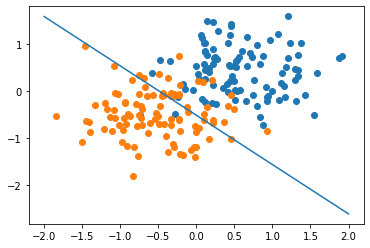

In [ ]:
def plot_line(w,b):
    x1 = -2
    x2 = 2
    y1 = -1*w[0]*x1/w[1]-b/w[1]
    y2 = -1*w[0]*x2/w[1]-b/w[1]
    plt.plot([x1,x2],[y1,y2])

plt.scatter(x1[:,0],x1[:,1])
plt.scatter(x2[:,0],x2[:,1])
plot_line(w[0],b)